In [1]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.providers.basic_provider import BasicSimulator
%matplotlib inline
import random
import numpy as np

In [3]:
#Classical
#arrayList = [1,4,2,6,5,7,3,9,8,0]
array_size = 1000
arrayList = np.random.choice(range(array_size), size=array_size, replace=False)

print(arrayList)

[278 495 103 882 515 896 450 108  65 213 366 789 690 225 115 469 586 609
 859 342 615  51  25 368 813 913 669 461 232 744 351 721 258 356 194 253
 433 413  64 639 560 906 606 663 574 361 275 758 263 251 770  91 617 464
  74 316 231 476 881 889 912 355 698 564 730 188 367  36 538 894 922 144
 910 659 652 827 911 997 405 154 941 561 753 138   9 661 386 651 647  49
 929 705 385 846 299 604 319 712 137  39 754 960 769 389 784 990 490 272
 709 229 927 343  59 823 401 863  38 840 968 227 242 196  24 146 826  55
 387 292 665 976 618 151 215 614 482 723 814 630 691  29  54 793 828   8
  22 547 866  48 704 235 274 237 378 228 552 423 397 562 974 467 938 132
 267 430 932 376 751 582 779 855 321 129 158 722 344 603  10 643 259 503
 883 898 350 602 621  71 548 857 616 656  34 686 393 528  76  17 987  60
 804 131 679 592 608 197 156 124 201  46 167 531 573 380 822 775 493 289
 300 934 977 527 145  16 175 182 637 435 853 636 110 475 492 396 569 172
 943 885 247 567 372 935 147 684 447 633 136  58 73

In [5]:
def oracle(number, num_array):
    winningNumber = random.choice(num_array)
    if number == winningNumber:
        return True
    else:
        return False

In [7]:
for index, number in enumerate(arrayList):
    if oracle(number, arrayList) is True:
        print(f"winning number: {number}")
        print(f"winning number index: {index}")
        print(f"execution count: {index + 1}")
        break

winning number: 249
winning number index: 498
execution count: 499


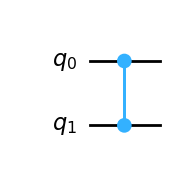

In [9]:
#Quantum Model Grover's Algorithm
#Oracle Circuit (WinningState |11>)

#Creating a specific Gate
#Equivalent to making a function in Classical
oracleCircuit = QuantumCircuit(2,name = "oracleCircuit")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')


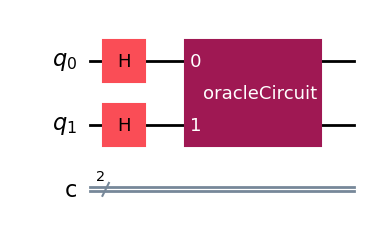

In [11]:
#Main Circuit
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
#Adding the new Gate (oracleCircuit) to our main circuit as a gate
mainCircuit.append(oracleCircuit,[0,1])

mainCircuit.draw(output='mpl')

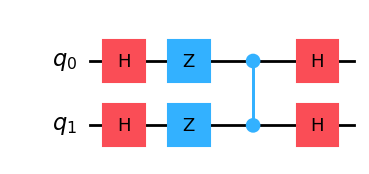

In [13]:
#Reflection Circuit (another function gate)
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

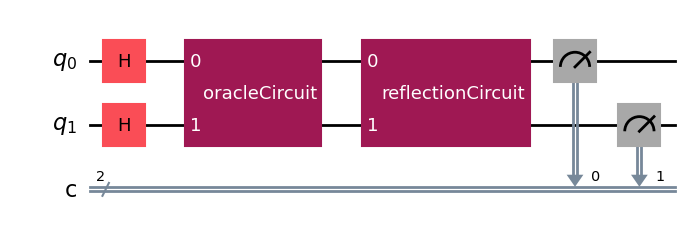

In [15]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

{'11': 1024}


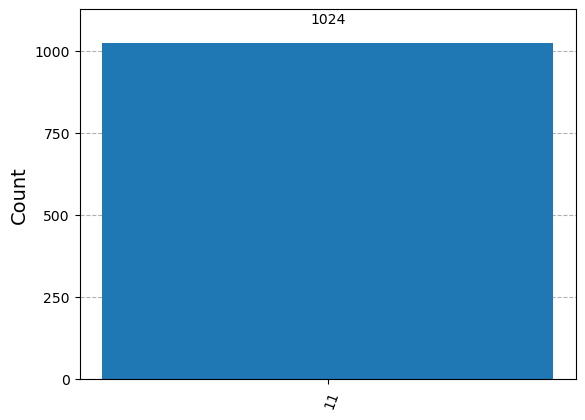

In [17]:
#You have to transpile the circuit to run 
simulator_aer = AerSimulator()
qc_aer = transpile(mainCircuit, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
counts = result.get_counts(mainCircuit)

print(counts)

plot_histogram(counts)